# Clasificación de tumores - maligno vs benigno empleando KNeighborsClassifier

En este proyecto formativo se construyó un modelo de machine learning utilizando K-Nearest Neighbors (KNN) para la clasificación de tumores como malignos o benignos. Se evaluó la correlación entre las variables independientes y la variable dependiente, observándose una alta correlación entre distintas variables independientes. Por esta razón, se empleó reducción de dimensionalidad y se seleccionó el mejor modelo con la menor cantidad de componentes. Este modelo se comparó con otro sin reducción de dimensiones ni normalización de sus parámetros, con el fin de analizar el efecto de la reducción de dimensionalidad y la normalización en el desempeño del modelo.

In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [3]:
cancer_dataset = load_breast_cancer()
cancer_df = pd.DataFrame(cancer_dataset.data, columns=cancer_dataset.feature_names)

In [4]:
print('Data size:', cancer_dataset.data.shape)
print('Target size:', cancer_dataset.target.shape)
print('Dataset target size: ', np.unique(cancer_dataset.target, return_counts=True))
print('Dataset target names:', cancer_dataset.target_names)

Data size: (569, 30)
Target size: (569,)
Dataset target size:  (array([0, 1]), array([212, 357]))
Dataset target names: ['malignant' 'benign']


In [5]:
cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [6]:
cancer_df["target"] = cancer_dataset.target

## Análisis exploratorio

In [7]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


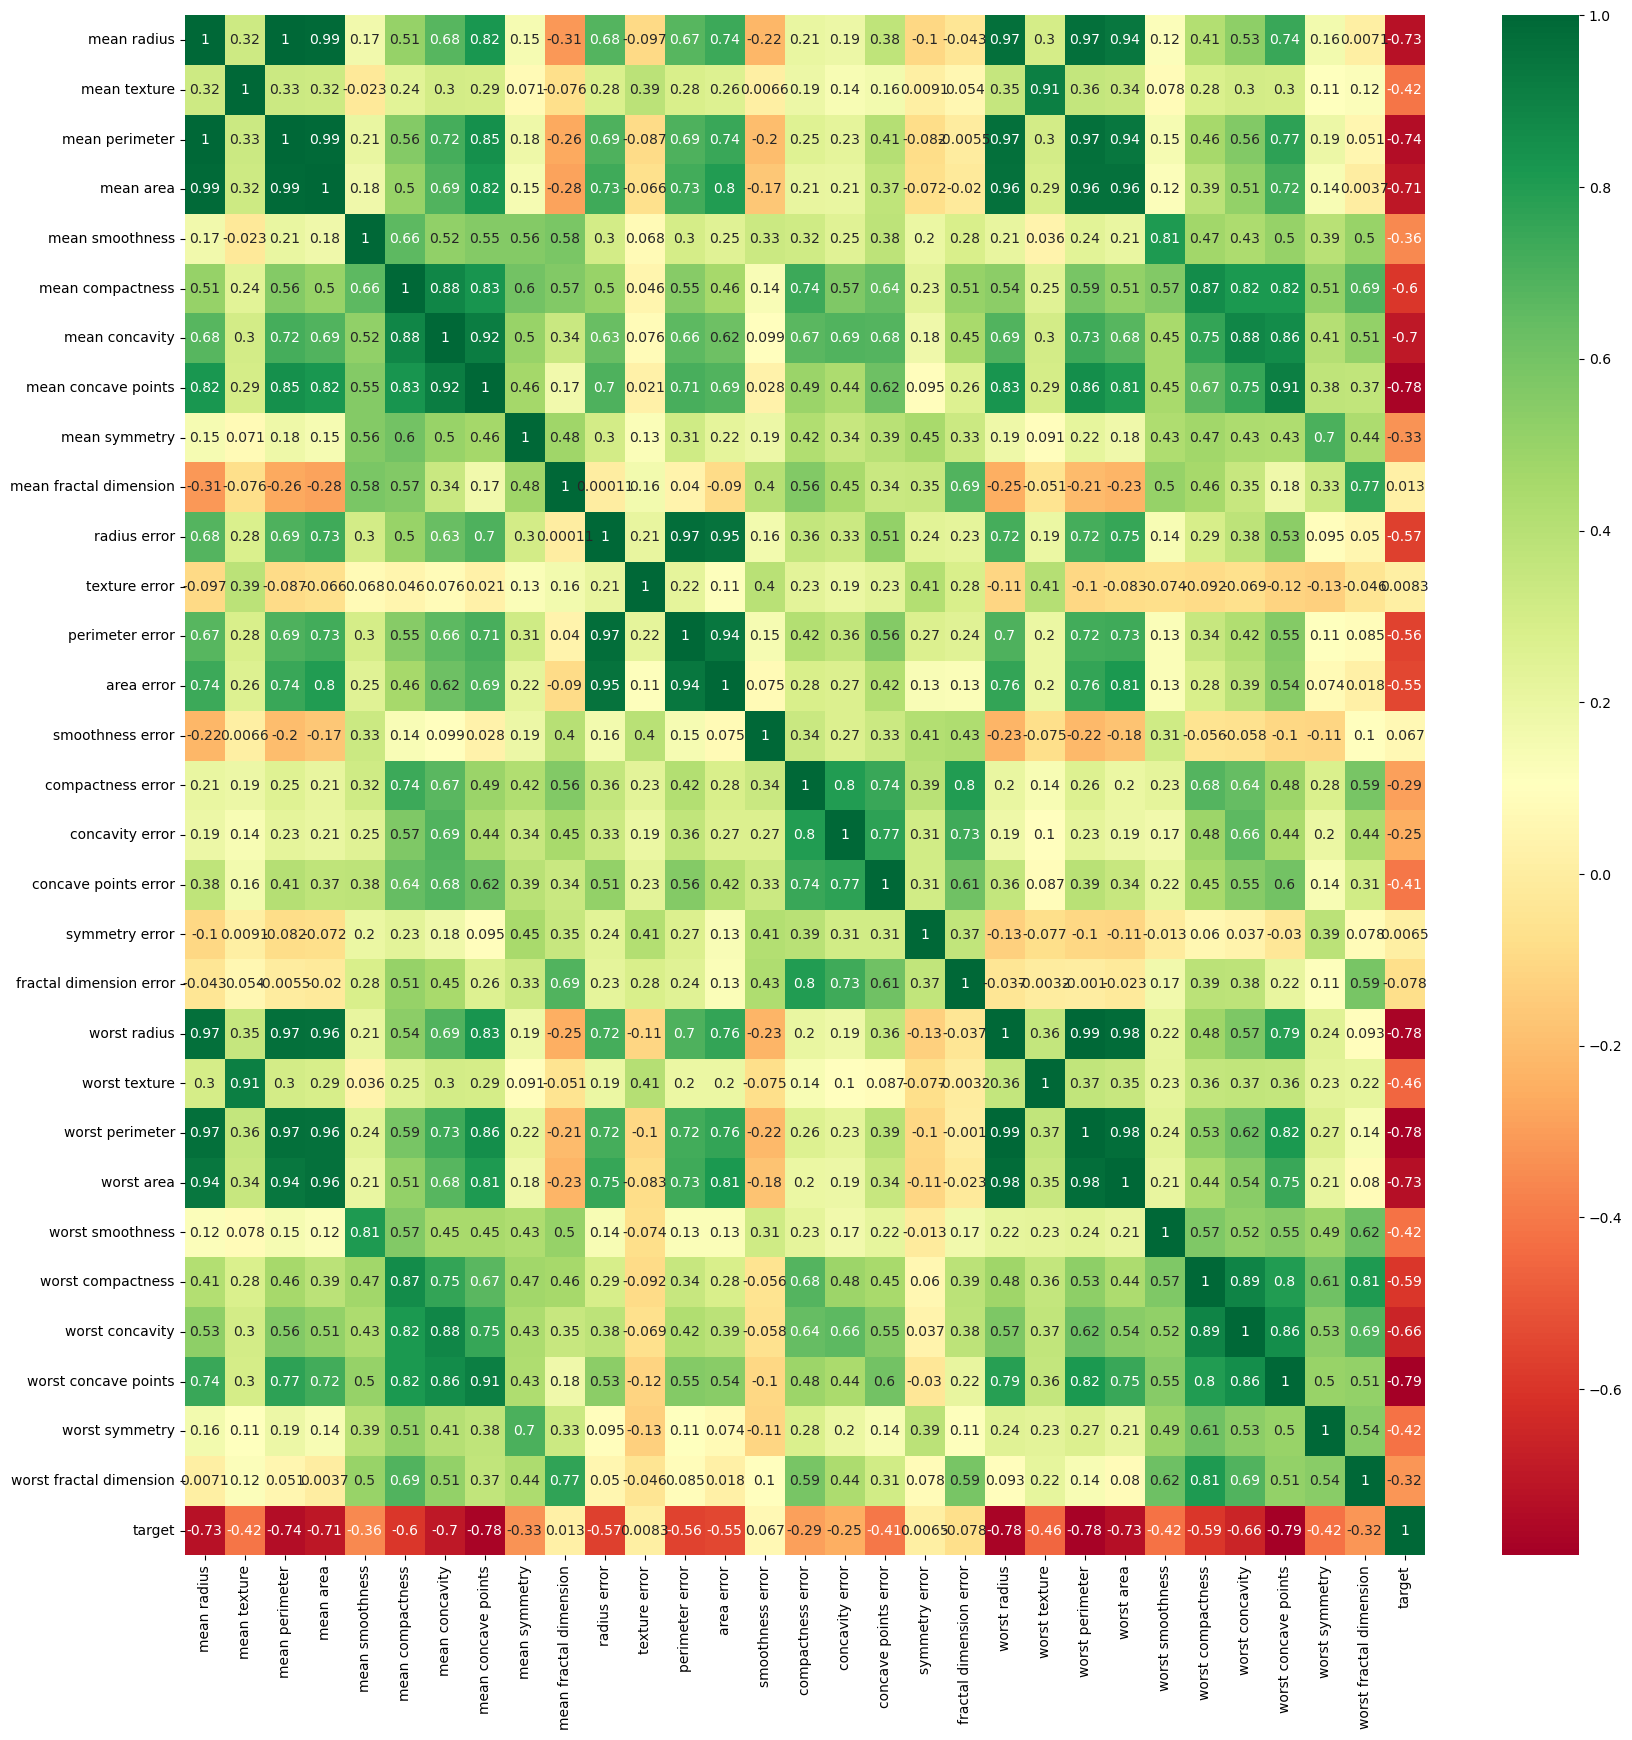

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = cancer_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlation_matrix, cmap= 'RdYlGn', annot =True)
plt.show()

La variable objetivo presentó una correlación negativa con la mayortia de las variables independientes (Mayor probabilidad del que tumor sea maligno), por lo que pueden asociarse a un pronostico desfavorable para el paciente. Sin embargo, algunas de las variables muestran una alta correlación, debido a esto se contruiran dos modelos

In [9]:
cancer_df.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [10]:
cancer_df.groupby('target')['target'].count()

target
0    212
1    357
Name: target, dtype: int64

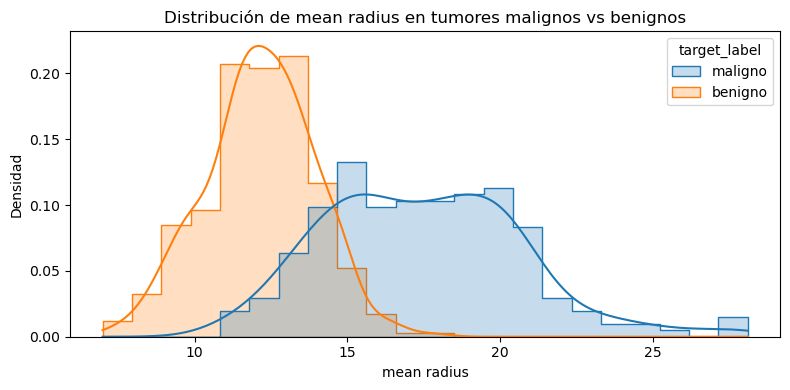

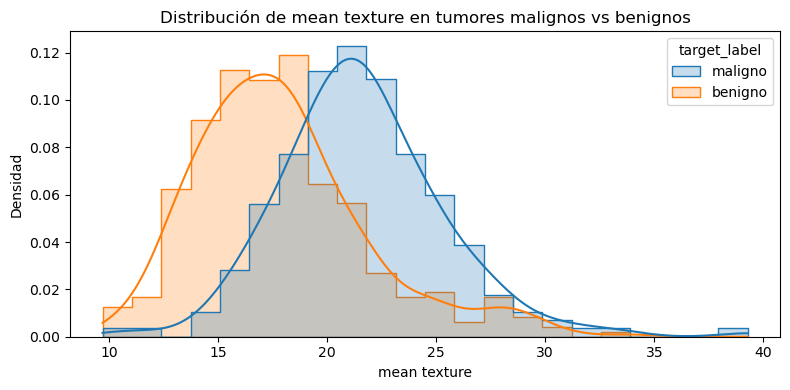

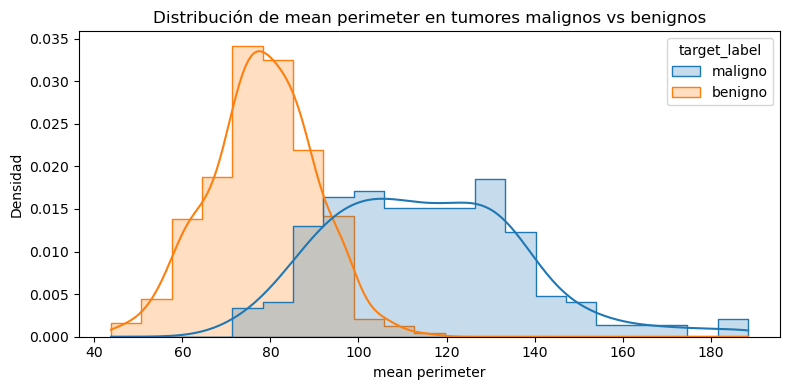

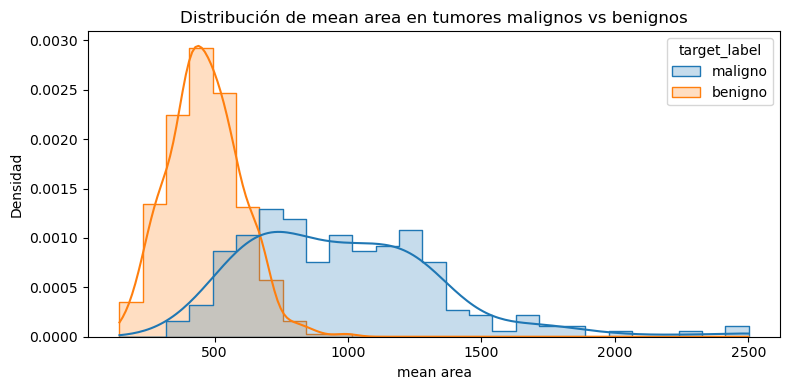

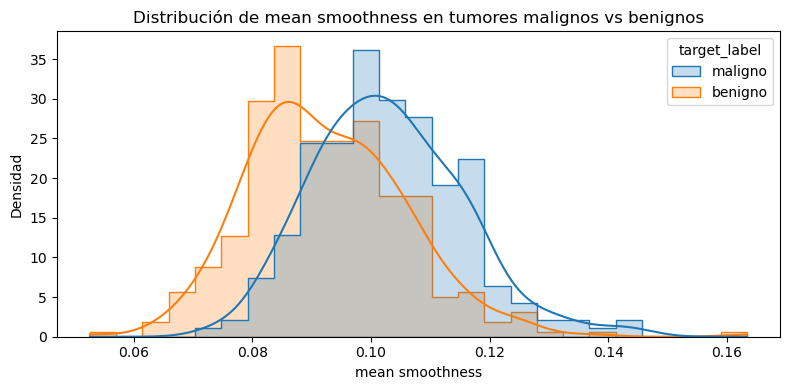

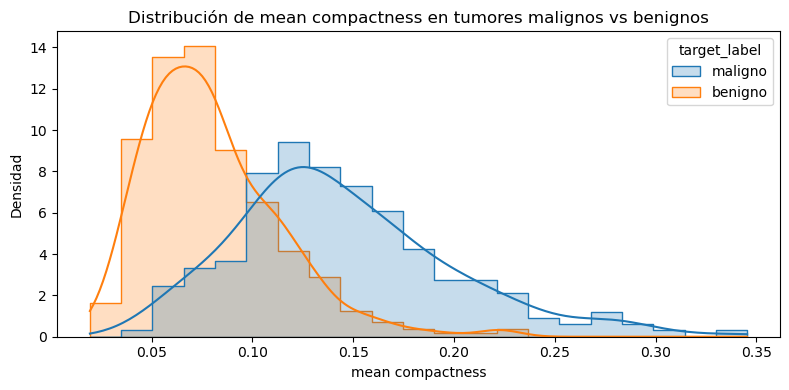

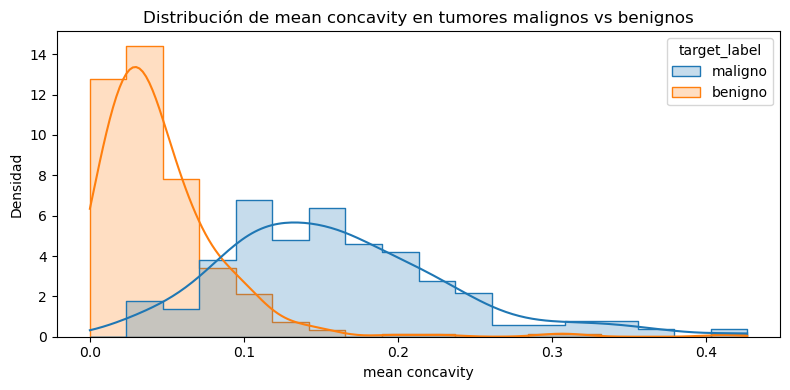

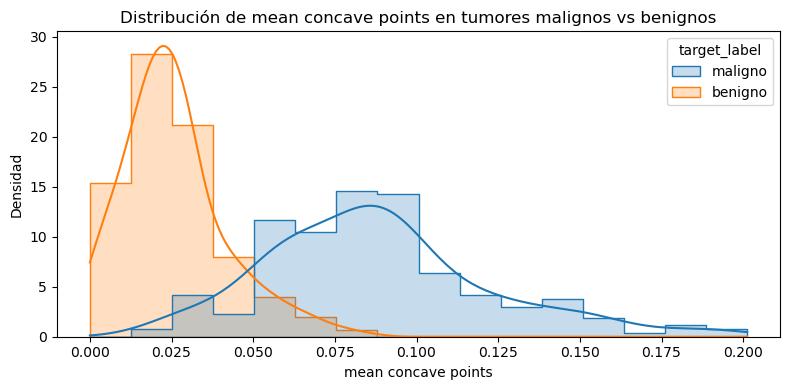

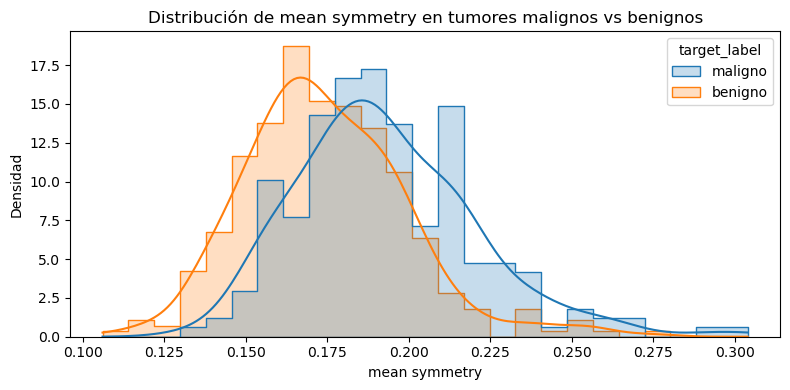

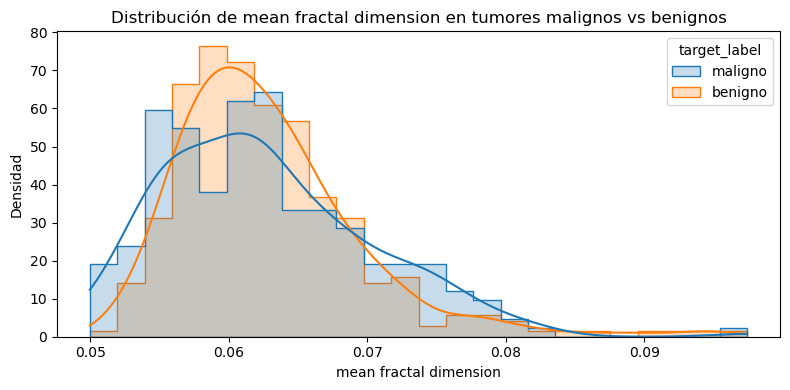

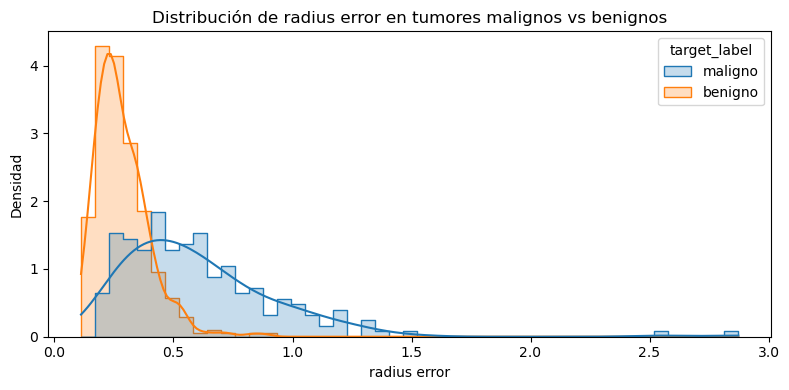

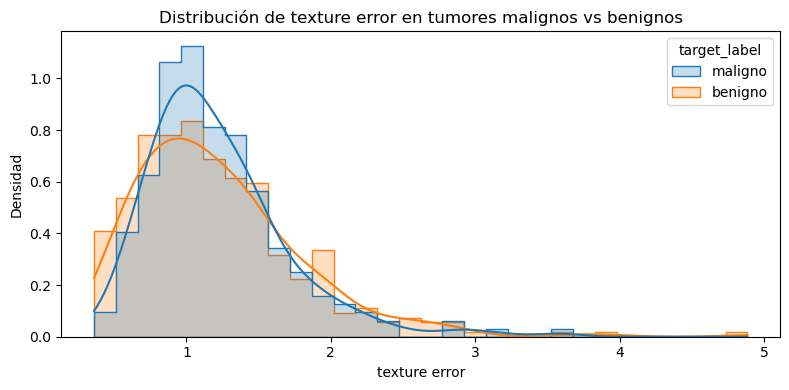

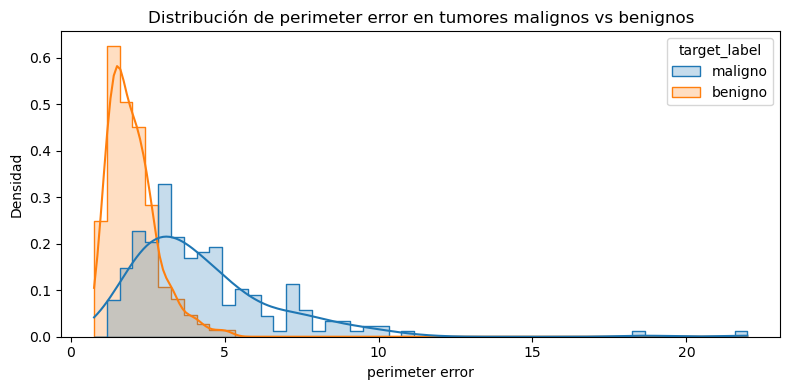

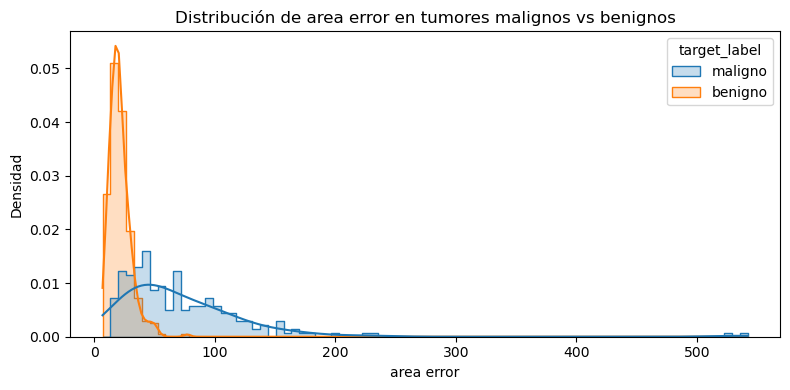

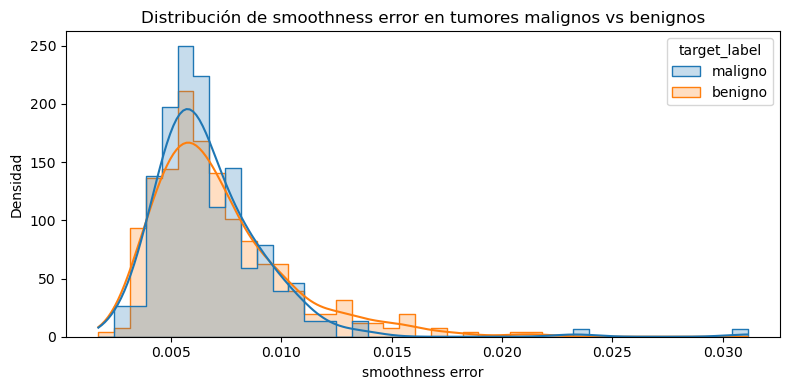

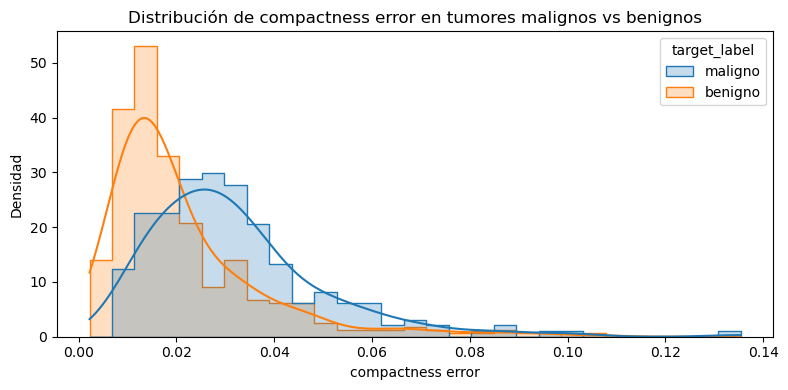

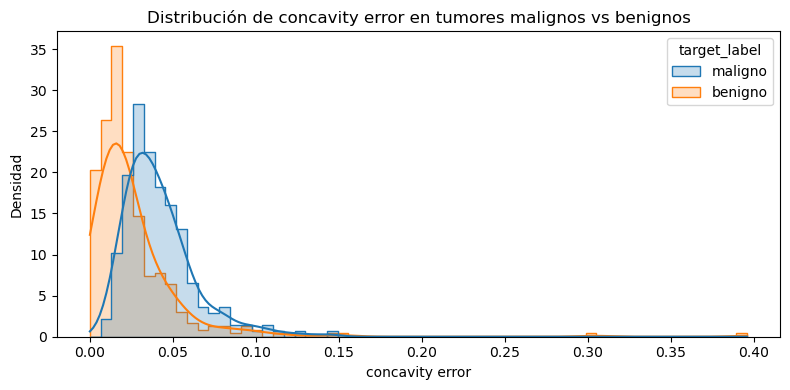

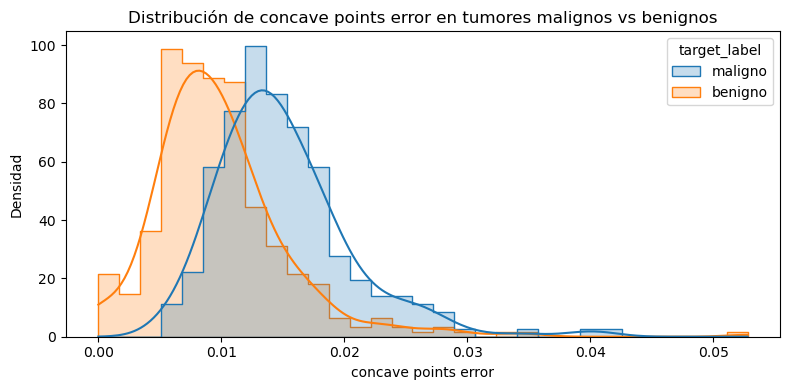

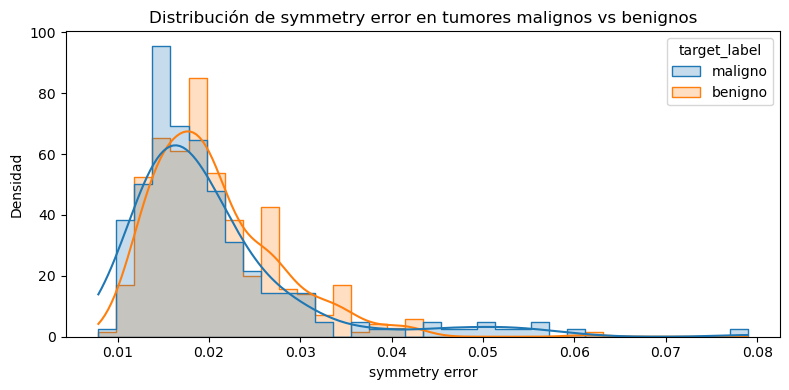

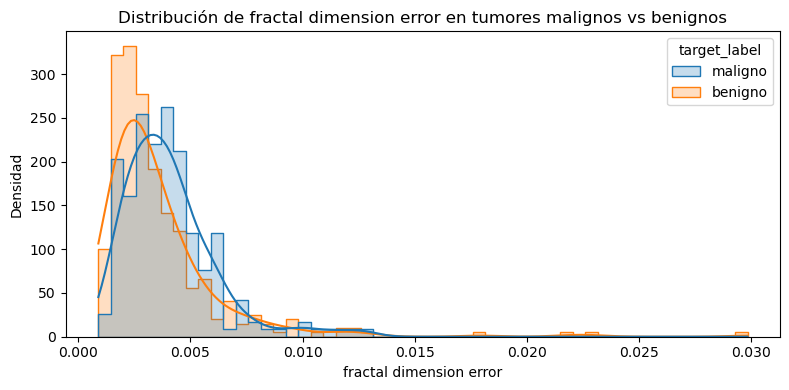

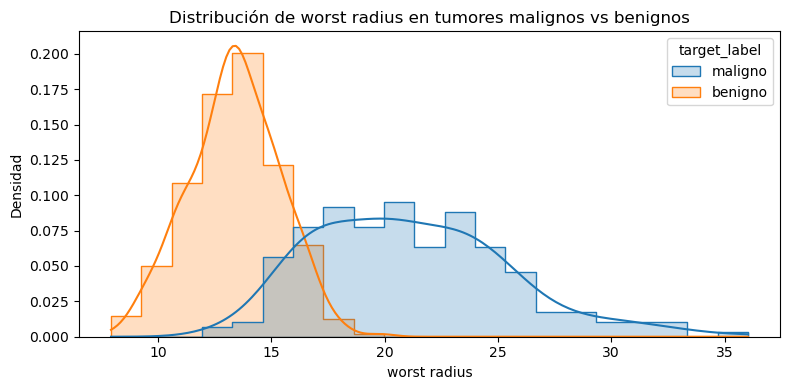

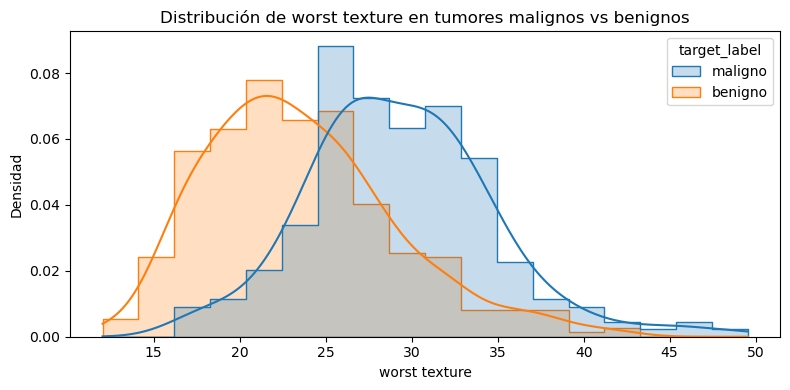

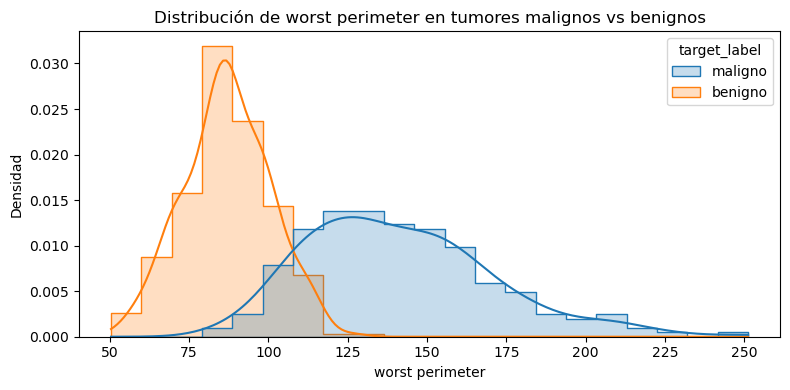

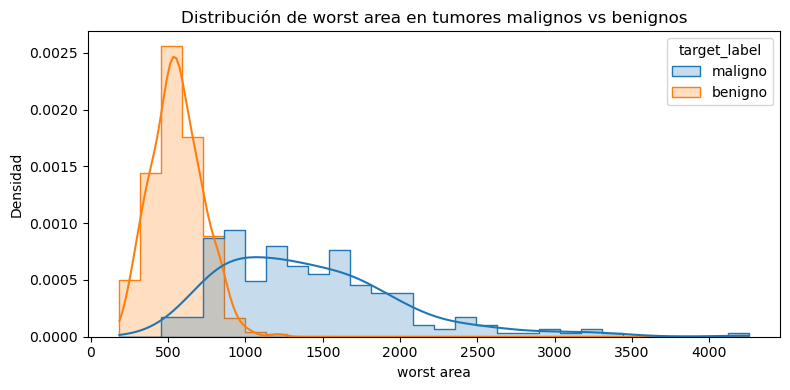

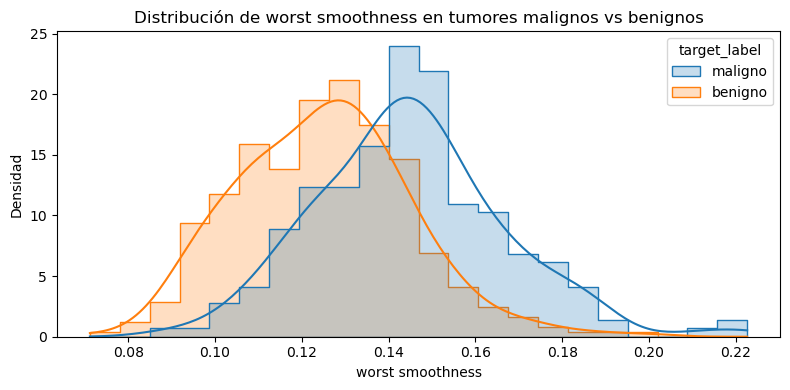

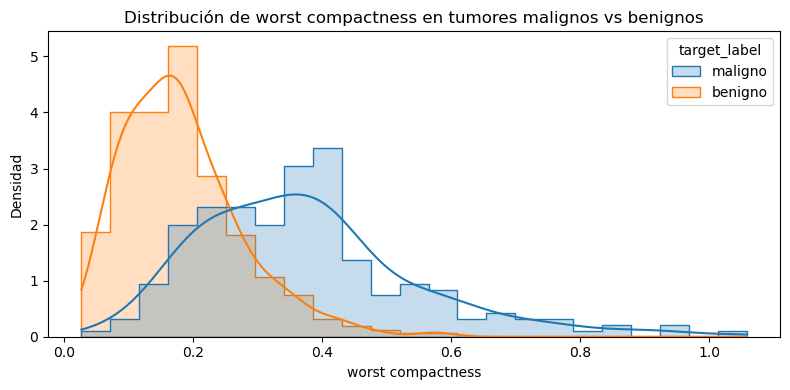

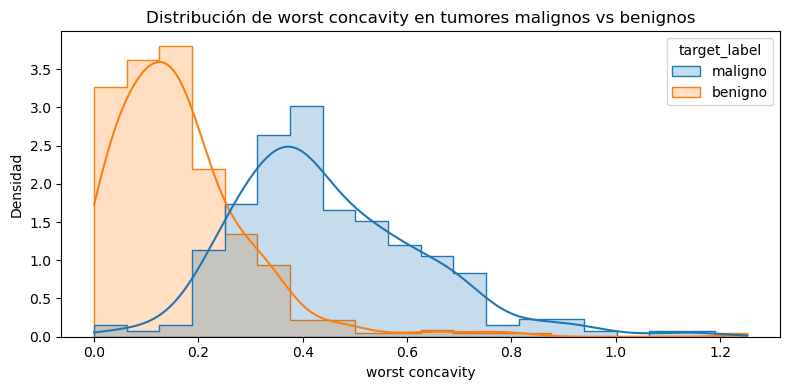

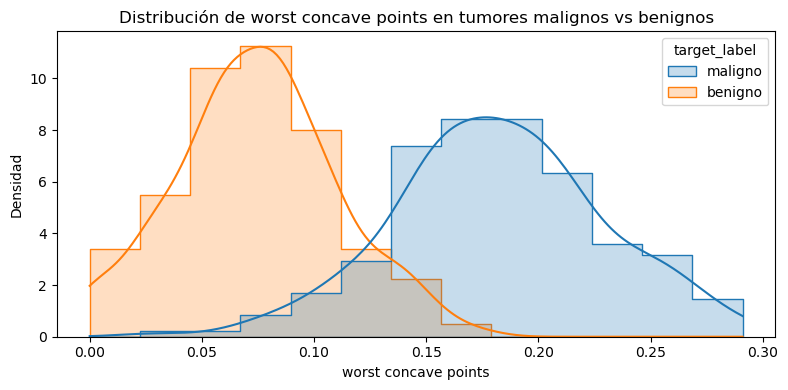

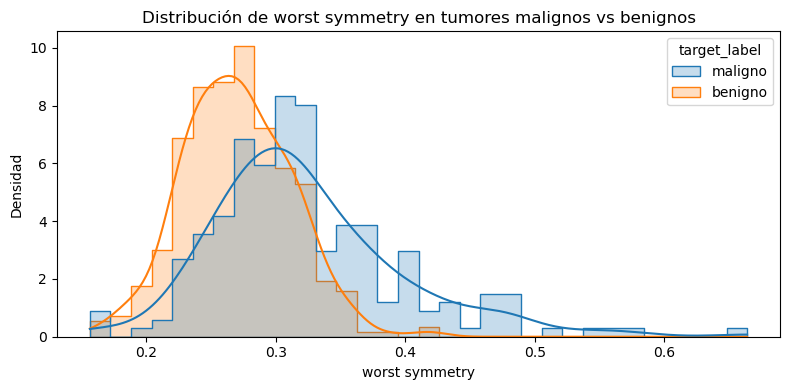

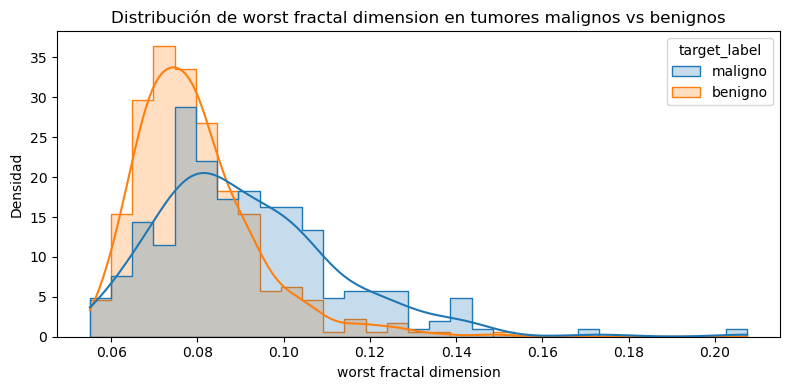

In [11]:
cancer_df['target_label'] = cancer_df['target'].map({0: 'maligno', 1: 'benigno'})

new_columns = cancer_df.drop(['target', 'target_label'], axis=1).columns
for col in new_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(
        data=cancer_df,
        x=col,
        hue='target_label',   # usar la columna con nombres
        kde=True,
        stat="density",
        element="step",
        palette='tab10',
        common_norm=False
    )
    plt.title(f'Distribución de {col} en tumores malignos vs benignos')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.tight_layout()
    plt.show()

## Contrucción del modelo sin procesamiento de las variables independientes

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    cancer_dataset.data, cancer_dataset.target, test_size=0.3, random_state=42, stratify=cancer_dataset.target
)

In [13]:
# Crea y entrena el clasificador KNN, n_neighbors=5 y calcula la precisión en el conjunto de prueba
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)
score = knn_classifier.score(x_test, y_test)
print('Test set accuracy:', score)  

Test set accuracy: 0.9239766081871345


In [14]:
k_values = range(1,15)
score_list = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train, y_train)
    score = knn_classifier.score(x_test, y_test)
    score_list.append(score)
    

In [15]:
predicciones = knn_classifier.predict(x_test)

In [16]:
score

0.9415204678362573

In [17]:
pred_df = pd.DataFrame(predicciones, columns=['prediccion'])
pred_df['real'] = y_test
pred_df.head()

,prediccion,real
0,1,0
1,1,1
2,1,1
3,0,0
4,1,0


In [18]:
confusion_matrix = pd.crosstab(pred_df.prediccion, pred_df.real, rownames=['Prediccion'], colnames=['Real'])
confusion_matrix

Real,0,1
Prediccion,,
0,57,3
1,7,104


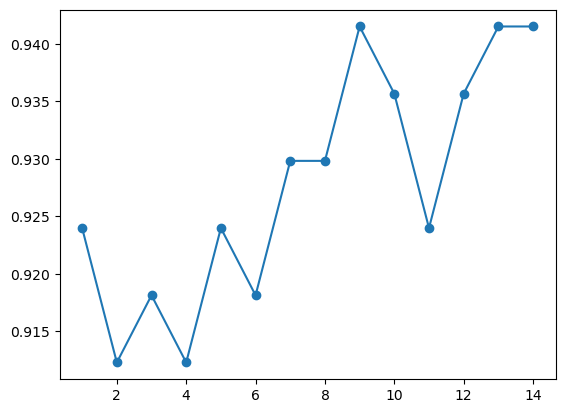

In [19]:
import matplotlib.pyplot as plt
plt.plot(k_values, score_list, marker='o')
plt.show()

## Normalización de las variables predictoras y reducción de dimensionalidad

In [20]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [21]:
# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)

# Optimizar número de componentes PCA
componentes = [5, 10, 15, 20, 25, 30]  # probar varios
pca_scores = []

for n in componentes:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    
    knn = KNeighborsClassifier(n_neighbors=5)  # valor temporal de n_neighbors
    score = cross_val_score(knn, X_pca, y_train, cv=5, scoring='accuracy').mean()
    pca_scores.append(score)

# Elegir el menor número de componentes con buen score
mejor_n_components = componentes[np.argmax(pca_scores)]
print("Mejor n_components:", mejor_n_components)

# Transformar con PCA óptimo
pca_final = PCA(n_components=mejor_n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

# Optimizar n_neighbors
vecinos = range(1, 21)
knn_scores = []

for k in vecinos:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_pca_final, y_train, cv=5, scoring='accuracy').mean()
    knn_scores.append(score)

mejor_n_neighbors = vecinos[np.argmax(knn_scores)]
print("Mejor n_neighbors:", mejor_n_neighbors)
print("Mejor accuracy:", max(knn_scores))

Mejor n_components: 10
Mejor n_neighbors: 5
Mejor accuracy: 0.9673417721518988


## Construcción del modelo

In [22]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
    
knn = KNeighborsClassifier(n_neighbors=5)  # valor temporal de n_neighbors
knn.fit(X_pca, y_train)

KNeighborsClassifier()

In [23]:
X_scal_test = scaler.transform(x_test) 
X_pca_test = pca.transform(X_scal_test)
score = knn.score(X_pca_test, y_test)
print('Test set accuracy:', score)  

Test set accuracy: 0.9532163742690059


### Evaluación del modelo

In [24]:
pred = knn.predict(X_pca_test)
pred_df2 = pd.DataFrame(pred, columns=['prediccion'])
confusion_matrix2 = pd.crosstab(pred_df2.prediccion, pred_df.real, rownames=['Prediccion'], colnames=['Real'])
confusion_matrix2

Real,0,1
Prediccion,,
0,57,1
1,7,106


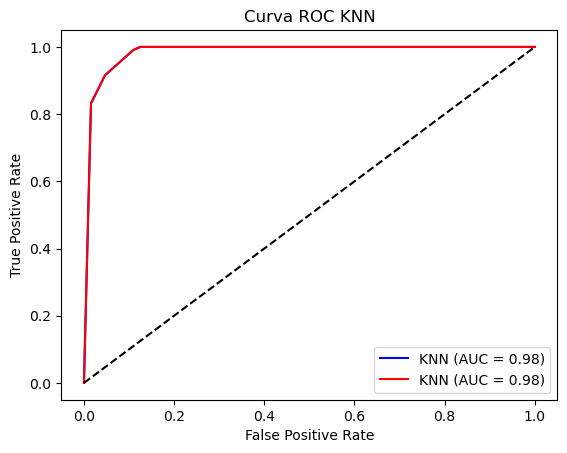

In [25]:
from sklearn.metrics import roc_curve, auc

# Suponiendo que knn ya está entrenado
probs = knn.predict_proba(X_pca_test)[:, 1]  # probabilidades de clase positiva
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)


probs2 = knn_classifier.predict_proba(x_test)[:, 1]  # probabilidades de clase positiva
fpr2, tpr2, thresholds = roc_curve(y_test, probs)
roc_auc2 = auc(fpr2, tpr2)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot(fpr2, tpr2, color='red', label=f'KNN (AUC = {roc_auc2:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC KNN')
plt.legend()

In [36]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for th in thresholds:
    prob_df['prediccion'] = np.where(prob_df[0] > th, 1, 0)
    cm = pd.crosstab(prob_df.prediccion, prob_df.actual,
                     rownames=['Prediccion'], colnames=['Actual'])
    print(f"\nThreshold = {th}")
    print(cm)


Threshold = 0.1
Actual       0    1
Prediccion         
0           54    0
1           10  107

Threshold = 0.2
Actual       0    1
Prediccion         
0           56    0
1            8  107

Threshold = 0.3
Actual       0    1
Prediccion         
0           56    0
1            8  107

Threshold = 0.4
Actual       0    1
Prediccion         
0           57    1
1            7  106

Threshold = 0.5
Actual       0    1
Prediccion         
0           57    1
1            7  106

Threshold = 0.6
Actual       0   1
Prediccion        
0           61   9
1            3  98

Threshold = 0.7
Actual       0   1
Prediccion        
0           61   9
1            3  98

Threshold = 0.8
Actual       0   1
Prediccion        
0           63  18
1            1  89

Threshold = 0.9
Actual       0   1
Prediccion        
0           63  18
1            1  89


In [33]:

prob_df = pd.DataFrame(probs)
therehold = 0.10
prob_df['prediccion'] = np.where(prob_df[0]>therehold, 1, 0)
prob_df['actual'] = y_test
confusion_matrix = pd.crosstab(prob_df.prediccion, prob_df.actual, rownames=['Prediccion'], colnames=['Actual'])
confusion_matrix

Actual,0,1
Prediccion,,
0,54,0
1,10,107


In [40]:
prob_df.groupby('actual')['actual'].count()

actual
0     64
1    107
Name: actual, dtype: int64

### Nota
Al evaluar distintos valores de threshold, se obtuvieron los mejores resultados con valores entre 0.1 y 0.3, los cuales lograron detectar todos los verdaderos positivos. Aunque los thresholds de 0.2 y 0.3 (con 8 falsos positivos) presentaron menos falsos positivos que 0.1 (con 10), la selección final del umbral debería ser realizada por un profesional médico, según lo que considere más adecuado para el caso clínico. En este contexto, es más importante maximizar la detección de verdaderos positivos, incluso si eso implica aceptar un mayor número de falsos positivos.